In [42]:
import os
os.environ["PYSYN_CDBS"] = "/Users/joesum/cdbs/grp/redcat/trds"
os.environ['SPISEA_MODELS'] = "/Users/joesum/cdbs/grp/redcat/trds" 
# Import necessary packages. 
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity
import numpy as np
import pdb
import matplotlib.pyplot as plt
from astropy.table import unique
import pickle 

# Making a Base Isochrone Object

In [ ]:
# Parameters of the SSP
log_age = np.log10(1e9)
distance = 10
extinction = 0  # takes extinction in Ks filter in magnitudes
metallicity = 0

# Evolution, atmosphere, and redshift models
evo_model = evolution.MISTv1()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()

# creating isocrones object 
isochrone = synthetic.Isochrone(
    log_age, extinction, distance, metallicity, 
    evo_model=evo_model, atm_func=atm_func, red_law=red_law
)

# plot the HR-diagram for your new isochrone
isochrone.plot_HR_diagram()

isochrone_file = open("isochrone.obj", "wb")
pickle.dump(isochrone, isochrone_file)


In [ ]:
isochrone.plot_mass_luminosity()

# Making an Isochrone with Synthetic Photometry

In [44]:
# Parameters of the SSP
log_age = np.log10(1e9)
distance = 10
extinction = 0  # takes extinction in Ks filter in magnitudes
metallicity = -0.3

# Evolution, atmosphere, and redshift models
evo_model = evolution.MISTv1()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()

# Setting filter list that will be used to create the photometry
# filters = ["ubv,U", "ubv,B", "ubv,V", "ubv,R", "ubv,I"] # Johnson-Cousins
# filters = ['decam,u', 'decam,g', 'decam,r', 'decam,i', 'decam,z', 'decam,Y'] # Dark Energy Cam
filters = ["wfc3,ir,f127m", "wfc3,ir,f139m", "wfc3,ir,f153m"] # Hubble Filters

# creating isocrones object 
isochronePhot = synthetic.IsochronePhot(
    log_age, extinction, distance, metallicity, 
    evo_model=evo_model, atm_func=atm_func, red_law=red_law,
    filters=filters
)

isochronePhot_file = open("isochronePhot.obj", "wb")
pickle.dump(isochronePhot, isochronePhot_file)


Isochrone generation took 53.325572 s.
Making photometry for isochrone: log(t) = 9.00  AKs = 0.00  dist = 10
     Starting at:  2022-03-14 13:41:43.934981   Usually takes ~5 minutes
Starting filter: wfc3,ir,f127m   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.105 Msun  T =  3064 K  m_hst_f127m = 9.99
M =   0.861 Msun  T =  5544 K  m_hst_f127m = 4.25
M =   1.919 Msun  T =  7551 K  m_hst_f127m = 0.59
M =   1.941 Msun  T =  5412 K  m_hst_f127m = 0.15
M =   1.963 Msun  T =  4406 K  m_hst_f127m = -2.74
M =   2.154 Msun  T =  4909 K  m_hst_f127m = -1.50
M =   2.166 Msun  T =  4099 K  m_hst_f127m = -4.01
M =   2.167 Msun  T =  3636 K  m_hst_f127m = -5.28
M =   2.167 Msun  T =  3602 K  m_hst_f127m = -5.37
M =   2.167 Msun  T =  3355 K  m_hst_f127m = -6.00
M =   2.168 Msun  T =  3412 K  m_hst_f127m = -5.78
M =   2.168 Msun  T =  6368 K  m_hst_f127m = -5.70
M =   2.168 Msun  T = 64482 K  m_hst_f127m = 0.92
M =   2.168 Msun  T = 75051 K  m_hst_f127m = 8.31
Starting filter: wfc

In [38]:
"""
Phase codes: 
101 = White Dwarf
102 = Neutron Star
103 = Black Hole
0 = Main Sequence Star???
1 = 
2 =
3 = 
4 = 
5 = 
"""
print(isochronePhot.points.keys())


['L', 'Teff', 'R', 'mass', 'logg', 'isWR', 'mass_current', 'phase', 'm_hst_f127m', 'm_hst_f139m', 'm_hst_f153m']


In [ ]:
unique(isochronePhot.points, keys=["phase"])

# Initial Mass Function

In [43]:
# Boundaries for each mass segment
mass_limits = np.array([0.2, 0.5, 1, 120])
# Power law slope associated with each mass segment
powers = np.array([-1.3, -2.3, -2.3])
# 
multiplicity = None
# initial_mass_func = imf.IMF(mass_limits, multiplicity)
initial_mass_func = imf.IMF_broken_powerlaw(mass_limits, powers, multiplicity)

pickle.dump(initial_mass_func, open("initial_mass_func.obj", "wb"))

# Resolved Cluster

In [4]:
iso = pickle.load(open("isochronePhot.obj", "rb"))
imf = pickle.load(open("initial_mass_func.obj", "rb"))

total_mass = 500
seed = None

cluster = synthetic.ResolvedCluster(iso, imf, total_mass)

pickle.dump(cluster, open("cluster.obj", "wb"))

print(cluster.star_systems.keys())

Found 29 stars out of mass range
['mass', 'isMultiple', 'systemMass', 'Teff', 'L', 'logg', 'isWR', 'mass_current', 'phase', 'm_hst_f127m', 'm_hst_f139m', 'm_hst_f153m']


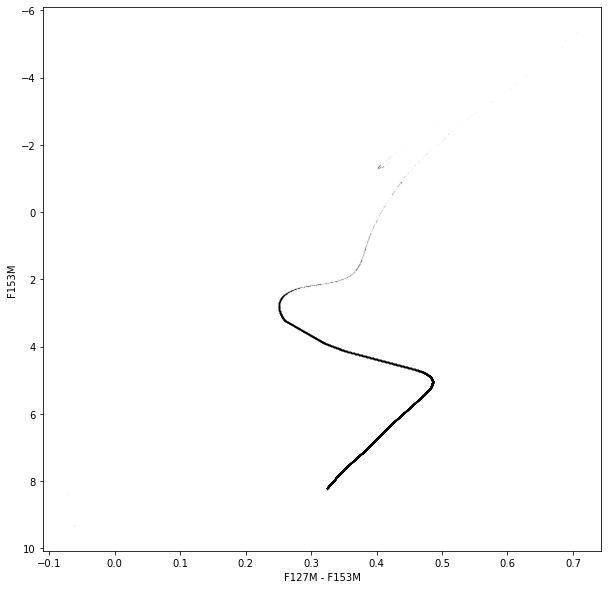

In [34]:
plt.plot(
    cluster.star_systems["m_hst_f127m"] - cluster.star_systems["m_hst_f153m"],
    cluster.star_systems["m_hst_f153m"],
    "k.",
    ms=1,
    alpha=0.05)
# plt.plot(
#     iso.points["m_hst_f127m"] - iso.points["m_hst_f153m"], iso.points["m_hst_f153m"],
#      "r-", label="Isochrone"
# )
plt.xlabel("F127M - F153M")
plt.ylabel("F153M")
plt.gca().invert_yaxis()
plt.rcParams["figure.figsize"] = (9,9)
plt.show()

In [41]:
print(cluster.star_systems.keys())
print(cluster.star_systems)

['mass', 'isMultiple', 'systemMass', 'Teff', 'L', 'logg', 'isWR', 'mass_current', 'phase', 'm_hst_f127m', 'm_hst_f139m', 'm_hst_f153m']
        mass        isMultiple ...    m_hst_f139m        m_hst_f153m    
------------------- ---------- ... ------------------ ------------------
 0.3179077656834814      False ...  7.443481629201654   7.18934023469427
  0.472293114073089      False ...  6.456021460093899  6.186502463154656
 0.7632824939730062      False ...   4.48187612949721 4.2599852213312825
 0.2511636711402923      False ...  7.969564133418451 7.7163821691834125
  0.344360689532387      False ...   7.27634398709233  7.021705119266363
0.22672794496385695      False ...  8.196162782618208  7.942955751766503
0.21746674949245953      False ...     8.286772113306  8.033444732400602
0.39704562363095053      False ...  6.938183105687466  6.677837152582589
 0.9887353869870463      False ... 2.6494586702836522  2.496724907030223
 0.4185706735527094      False ... 6.8020306472669105  6.5392

# Unresolved Cluster

In [36]:
iso = pickle.load(open("isochronePhot.obj", "rb"))
imf = pickle.load(open("initial_mass_func.obj", "rb"))

total_mass = 1e3
seed = None

unresolved_cluster = synthetic.UnresolvedCluster(iso, imf, total_mass, [3000,52000], verbose=False)

pickle.dump(unresolved_cluster, open("cluster.obj", "wb"))

Mass matching took 0.918134 s.
Spec summing took 0.018240s
Spec trimming took 0.000647s
Total cluster mass is 621.925049 M_sun


In [40]:
dir(iso)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'check_save_file',
 'filters',
 'make_photometry',
 'plot_CMD',
 'plot_HR_diagram',
 'plot_mass_luminosity',
 'plot_mass_magnitude',
 'points',
 'recalc',
 'save_file',
 'save_file_legacy',
 'spec_list',
 'verbose']

In [37]:
dir(unresolved_cluster)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'cluster_mass',
 'ifmr',
 'imf',
 'iso',
 'mass',
 'mass_all',
 'mass_tot',
 'seed',
 'spec_list',
 'spec_list_trim',
 'spec_tot_full',
 'spec_trim',
 'verbose',
 'wave_trim']

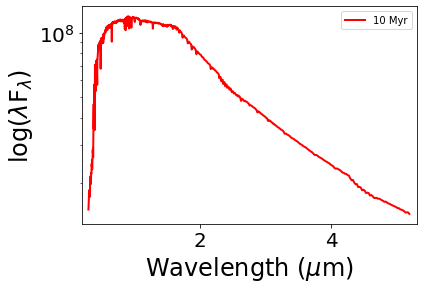

In [38]:
plt.plot(unresolved_cluster.wave_trim*10**-4,
        unresolved_cluster.wave_trim*unresolved_cluster.spec_trim,
        'r-', label='10 Myr', linewidth=2)
plt.xlabel('Wavelength ($\mu$m)', fontsize=24)
plt.ylabel('log($\lambda$F$_{\lambda}$)', fontsize=24)
plt.tick_params(axis='both', labelsize=20)
plt.legend()
plt.xlim(0.2,5.3)
plt.gca().set_yscale('log')

In [7]:
# spec_list = pysynphot object with wavelength list and corresponding flux values
# spec_list_trim = TabluarSourceSpectrum object/ spec_list = ArraySourceSpectrum object

print(len(unresolved_cluster.spec_list))
print("Flux")
print(unresolved_cluster.spec_list[0].flux[0:10])
print("Wave")
print(unresolved_cluster.spec_list[0].wave[0:10])
print()
print()
print(len(unresolved_cluster.spec_list_trim))
print("Flux")
print(unresolved_cluster.spec_list_trim[0].flux[0:10])
print("Wave")
print(unresolved_cluster.spec_list_trim[0].wave[0:10])
print()
print()
print(len(unresolved_cluster.spec_trim))
print("Flux")
print(unresolved_cluster.spec_list_trim[0].flux[0:10])
print("Wave")
print(unresolved_cluster.spec_list_trim[0].wave[0:10])

579
Flux
[6.76676737e-16 8.72363196e-16 1.03743051e-15 2.10978815e-15
 1.38384536e-15 3.11099683e-15 4.45349008e-15 5.82409016e-15
 6.39832436e-15 4.56296348e-15]
Wave
[3010. 3030. 3050. 3070. 3090. 3110. 3130. 3150. 3170. 3190.]


579
Flux
[6.76676737e-16 8.72363196e-16 1.03743051e-15 2.10978815e-15
 1.38384536e-15 3.11099683e-15 4.45349008e-15 5.82409016e-15
 6.39832436e-15 4.56296348e-15]
Wave
[3010. 3030. 3050. 3070. 3090. 3110. 3130. 3150. 3170. 3190.]


In [5]:
iso = pickle.load(open("isochronePhot.obj", "rb"))
imf = pickle.load(open("initial_mass_func.obj", "rb"))

total_mass = 5e3
seed = None

unresolved_cluster = synthetic.UnresolvedCluster(iso, imf, total_mass, [3000,52000], verbose=False)

pickle.dump(unresolved_cluster, open("cluster.obj", "wb"))


Mass matching took 4.186158 s.
Spec summing took 0.027387s
Spec trimming took 0.002041s
Total cluster mass is 3063.696556 M_sun


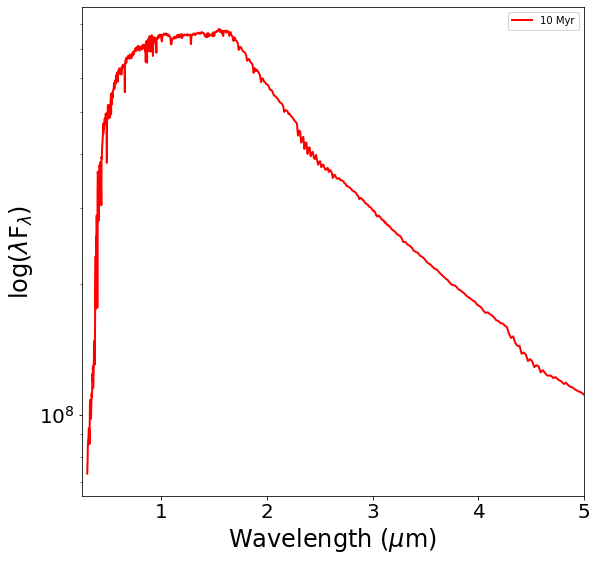

In [8]:
plt.plot(unresolved_cluster.wave_trim*10**-4,
        unresolved_cluster.wave_trim*unresolved_cluster.spec_trim,
        'r-', label='10 Myr', linewidth=2)
plt.xlabel('Wavelength ($\mu$m)', fontsize=24)
plt.ylabel('log($\lambda$F$_{\lambda}$)', fontsize=24)
plt.tick_params(axis='both', labelsize=20)
plt.legend()
plt.xlim(0.25,5.0)
plt.gca().set_yscale('log')
plt.rcParams["figure.figsize"] = (9,9)

In [ ]:
Mg_H_bins = []
Fe_H_bins = []
Age_bins = []